In [2]:
import json
import pandas as pd
data_fermi = json.load(open("plotly/data/fermi.json", "r"))
data_atnf = json.load(open("plotly/data/atnf.json", "r"))
units_atnf = {k: v[1] if v[1] != "" else None for k, v in data_atnf[0].items()}
data_atnf = pd.DataFrame(
    {k: [d[k][0] for d in data_atnf] for k in data_atnf[0].keys()}
)
units_fermi = {
    k: v[1] if v[1] != "" else None for k, v in data_fermi[0].items()
}
data_fermi = pd.DataFrame(
    {k: [d[k][0] for d in data_fermi] for k in data_fermi[0].keys()}
)
data = pd.merge(
    data_fermi, data_atnf, on="Name", how="outer", indicator="Catalog"
)
data["Catalog"].replace(
    {"left_only": "Fermi", "right_only": "ATNF", "both": "Both"}, inplace=True
)
units = {**units_fermi, **units_atnf}

array([5.e+01, 1.e+02, 1.e+02, 3.e+02, 3.e+02, 1.e+03, 1.e+03, 3.e+03,
       3.e+03, 1.e+04, 1.e+04, 3.e+04, 3.e+04, 1.e+05, 1.e+05, 1.e+06])

(6.032185601717588e-16, 7.238622722061105e-12)

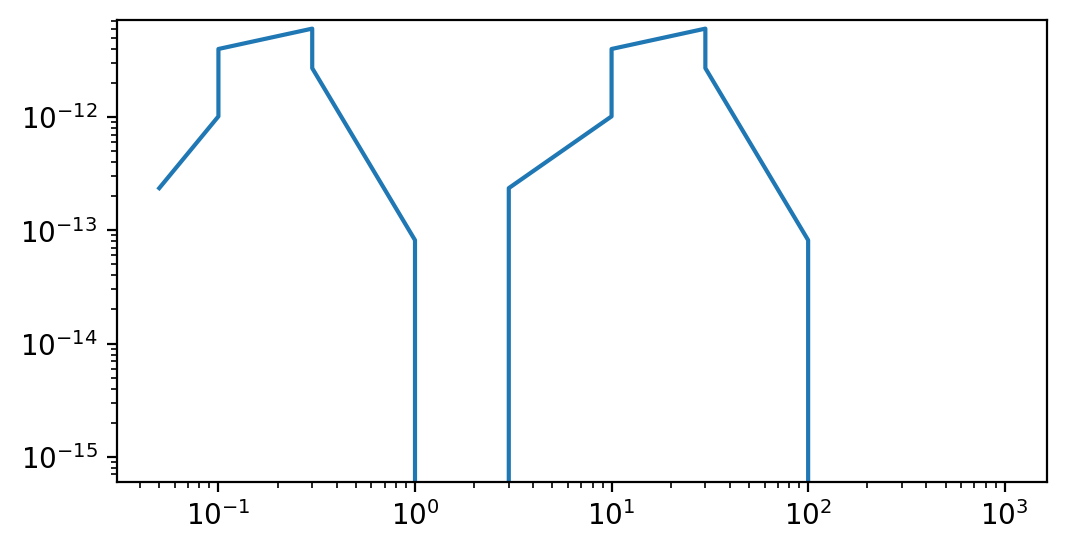

In [20]:
psr = data[data["Catalog"] != "ATNF"].iloc[13]

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6, 3), dpi=200)
xedges = np.sort(np.unique(psr["Band"])) / 1e3
xcenters = np.sqrt(xedges[:-1] * xedges[1:])
# plt.stairs(psr['nuFnu_Band'], xedges)
xs, ys = np.array(psr["Band"]).flatten() / 1e3, psr['nuFnu_Band'] * 2
plt.plot(xs, ys)
# plt.scatter(xcenters, psr['nuFnu_Band'], marker='o', s=10, color='k')

yerr = np.abs(np.array([psr['nuFnu_Band']] * 2).T * np.array(psr['Unc_Flux_Band']) / np.array([psr['Flux_Band']] * 2).T).T
uplims = np.any(np.isnan(psr['Unc_Flux_Band']), axis=1)
plt.errorbar(xcenters, psr['nuFnu_Band'], yerr=yerr, uplims=uplims)
plt.xscale('log')
plt.yscale('log')
plt.ylim(np.max(psr['nuFnu_Band']) / 1e4, 1.2 * np.max(psr['nuFnu_Band']))

In [87]:
yerr

array([[           nan, 4.81980036e-13, 2.18667242e-13, 2.19360061e-13,
        1.75319535e-13, 4.93221739e-14,            nan,            nan],
       [2.35113350e-12, 5.01841575e-13, 2.18667242e-13, 2.19360061e-13,
        1.75319535e-13, 7.39323264e-14, 1.09019085e-13, 1.81866971e-13]])

In [28]:
psr.keys()

Index(['Source_Name', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT', 'Signif_Avg',
       'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType',
       'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index',
       'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_IndexS',
       'Unc_PLEC_IndexS', 'PLEC_ExpfactorS', 'Unc_PLEC_ExpfactorS',
       'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'PLEC_EPeak',
       'Unc_PLEC_EPeak', 'Flux_Band', 'Unc_Flux_Band', 'nuFnu_Band',
       'ASSOC_TEV', 'Flags', 'Name', 'Band', 'P0', 'dP0', 'P1', 'dP1', 'Dist',
       'Edot', 'Bsurf', 'Catalog'],
      dtype='object')